# Árvores de regressão - exercícios 01

Nesta bateria de exercícios, vamos botar em prática o que aprendemos com a base de dados imobiliários de Boston, que pode ser baixada do módulo ```datasets``` do scikitlearn. Essa base de dados possui uma linha por cidade, o objetivo é prever, ou fornecer uma estimativa de ```MEDV```, ou o valor mediano de casas ocupadas pelo dono, dadas as demais variáveis usadas como explicativas.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade |
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

# 1. Certifique-se de que esta base está no formato adequado para o scikit-learn.


In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Creating a DataFrame
columns = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
    'PTRATIO', 'B', 'LSTAT', 'MEDV'
]
df = pd.DataFrame(np.column_stack([data, target]), columns=columns)


In [22]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [23]:
y.head()

0    N
1    P
2    N
3    N
4    N
Name: MEDV, dtype: category
Categories (2, object): ['N', 'P']

### 2. Visualize a matriz de correlação e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.


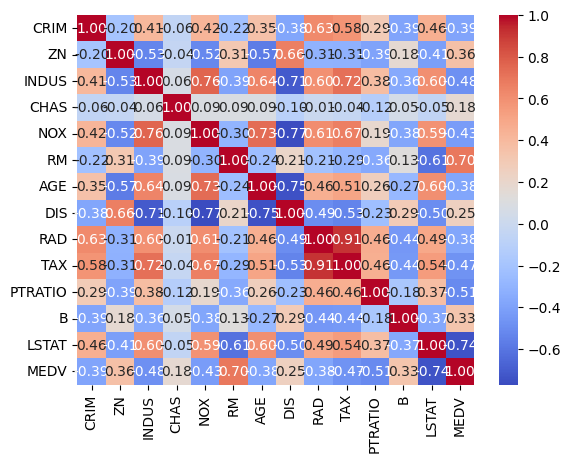

In [24]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()


### 3. Separe os dados em validação e teste.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('MEDV', axis=1),
    df['MEDV'],
    test_size=0.2,
    random_state=42
)

### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [26]:
tree_depth_8 = DecisionTreeRegressor(max_depth=8, random_state=42)
tree_depth_2 = DecisionTreeRegressor(max_depth=2, random_state=42)

tree_depth_8.fit(X_train, y_train)
tree_depth_2.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=2, random_state=42)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [27]:
from sklearn.metrics import mean_squared_error

y_train_pred_8 = tree_depth_8.predict(X_train)
y_test_pred_8 = tree_depth_8.predict(X_test)

y_train_pred_2 = tree_depth_2.predict(X_train)
y_test_pred_2 = tree_depth_2.predict(X_test)

mse_train_8 = mean_squared_error(y_train, y_train_pred_8)
mse_test_8 = mean_squared_error(y_test, y_test_pred_8)

mse_train_2 = mean_squared_error(y_train, y_train_pred_2)
mse_test_2 = mean_squared_error(y_test, y_test_pred_2)

print(f'MSE Train (Depth 8): {mse_train_8}')
print(f'MSE Test (Depth 8): {mse_test_8}')
print(f'MSE Train (Depth 2): {mse_train_2}')
print(f'MSE Test (Depth 2): {mse_test_2}')


MSE Train (Depth 8): 1.9490192185625448
MSE Test (Depth 8): 8.978508612023766
MSE Train (Depth 2): 25.654637281631615
MSE Test (Depth 2): 25.993190895971196


###  6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?.

### * Árvore com Profundidade 8:
* MSE Treinamento: 1.95
* MSE Teste: 8.98
### * Árvore com Profundidade 2:

* MSE Treinamento: 25.65
* MSE Teste: 25.99

Nesse caso, a árvore com profundidade 8 continua sendo preferível, pois possui um MSE significativamente menor no conjunto de teste em comparação com a árvore com profundidade 2. O menor MSE no conjunto de teste sugere que a árvore com profundidade 8 generaliza melhor para novos dados, mesmo que tenha um ajuste muito bom nos dados de treinamento. Portanto, com base na métrica de MSE, a árvore com profundidade 8 parece mais adequada para este conjunto de dados.








### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

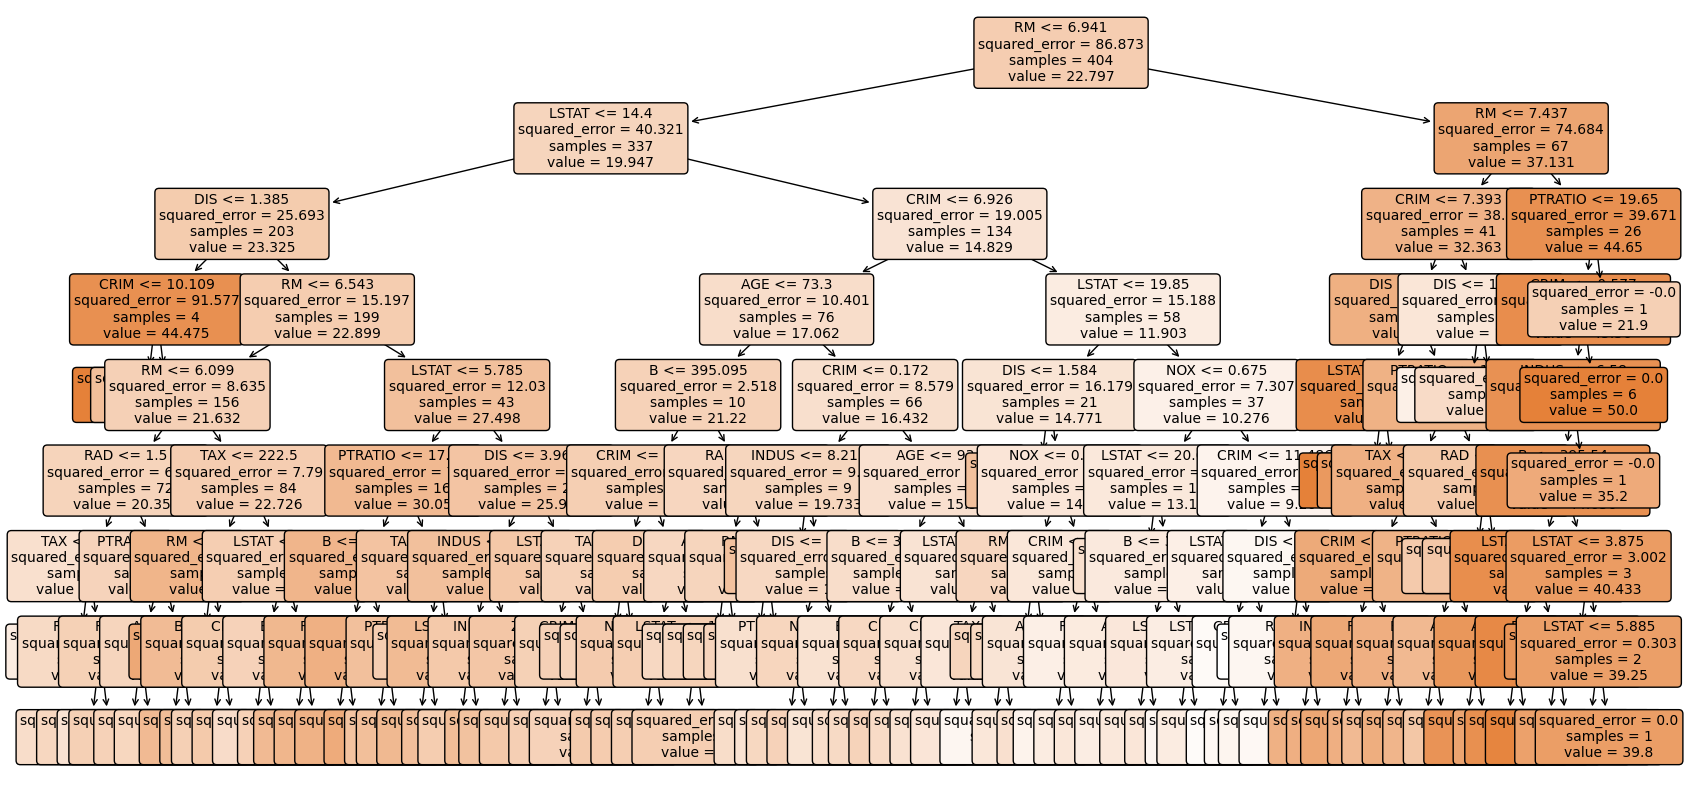

In [20]:
plt.figure(figsize=(20, 10))
tree.plot_tree(tree_depth_8, filled=True, feature_names=X_train.columns, rounded=True, fontsize=10)
plt.show()

# Visualização da Árvore de Decisão em PDF para Facilitar a Análise dos Valores de Imóveis em Boston

In [19]:
!apt-get install graphviz
from sklearn.tree import export_text, export_graphviz
import graphviz

# Visualização em um arquivo DOT
dot_data = export_graphviz(
    tree_depth_8,
    out_file=None,
    feature_names=X_train.columns,
    filled=True,
    rounded=True,
    special_characters=True
)

# Salvar o DOT em um arquivo
with open("tree_depth_8.dot", "w") as f:
    f.write(dot_data)

# Visualizar o arquivo DOT
graph = graphviz.Source(dot_data)
graph.render("tree_depth_8", format="png", cleanup=True)

# Exibir a imagem
graph.view("tree_depth_8")


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


'tree_depth_8.pdf'